# Laboratório 2 -  Turma 22 - 13/09/2021

## Henrique Martinez Rocamora (9836332)
## Flávio Ferreira Menten (9836691)
## Diogo Vieira (9836200)
## Pedro Henrique Campos Dini (10772797)

## Exercício 1

Um telefone celular de massa m está suspenso por quatro fios flexíveis como indicado na figura, de modo que, na configuração de equilíbrio, o plano da tela do celular está horizontal. A disposição dos fios de suspensão, assim como suas dimensões, respeita a simetria indicada (planos verticais por *C* nas direções *x* e *y*). Colocando o sistema para oscilar com pequenas amplitudes nas direções *x* e *y*, deseja-se determinar o momento de inércia do celular em torno do eixo *y* que passa pelo centro de massa C ($J_{Cyy}$). Pede-se, portanto:

![Ex1](ex1.png)

### **1a)** Determinar as equações diferenciais dos movimentos horizontais do centro de massa *C* do celular nas direções *x* e *y*, supondo pequenas amplitudes de oscilação.

Rotação em torno do eixo y:
$$
J_{Oyy}  \ddot \Theta = -mg L \sin \Theta \\
\Theta \approx 0 \Rightarrow \sin  \Theta = \Theta \Rightarrow  J_{Oyy}  \ddot \Theta = -mg L \Theta \\
J_{Oyy} = J_{Cyy} + mL^2 \\
( J_{Cyy} + mL^2) \cdot \ddot \Theta = -mg L \Theta \\
$$
Translação no eixo y:
$$
2T \cos \delta = mg \\
m \ddot y = -2T \sin  \delta = -mg \frac{ \sin \delta}{\cos \delta} \delta  = -mg \tg \delta\\
\delta \approx 0 \Rightarrow \tg \delta = y/L \\
m \ddot y = - \frac{mg}{L} \cdot y \Rightarrow  \ddot y = - \frac{g}{L} \cdot y
$$

### **1b)** Determinar as frequências naturais de oscilação nas duas direções.

$$
\begin{cases}
    \omega_x = \sqrt{\frac{mgL}{J_{Cyy}+mL^2}} \\
    \omega_y = \sqrt{\frac{g}{L} }
\end{cases}
$$

### **1c)** Combinando os resultados, calcular $J_{Cyy}$.

$$  (J_{Cyy} + mL^2) \cdot \omega_x^2 = mgL \Rightarrow (\frac{J_{Cyy}}{g^2} + m \cdot \frac{L^2}{g^2}) \cdot \omega_x^2 = m \cdot \frac{L}{g} \\
(\frac{J_{Cyy}}{g^2} + m \cdot \frac{1}{\omega_y^4}) \cdot \omega_x^2 = m \cdot \frac{1}{\omega_y^2} \\
\frac{J_{Cyy} \cdot \omega_x^2 }{g^2}  = m \cdot \frac{1}{\omega_y^2} - m \cdot \frac{1}{\omega_y^4} \cdot \omega_x^2\\
J_{Cyy} = m g^2 \left( \frac{1}{\omega_y^2 \cdot \omega_x^2} -  \frac{1}{\omega_y^4} \right) 
$$

## Exercício 2

Utilizando o celular que será utilizado como instrumento de medida em vários dos experimentos da disciplina, apoiá-lo
sobre um cilindro de pequeno diâmetro (mina de grafite, fio de arame, carga de esferográfica) de modo a verificar a posição real do centro de massa no plano *x*, *y* e o quanto ela dista do centro do retângulo externo do celular.
Com base na disposição da figura e no equacionamento correspondente, suspender o celular em dois laços de fios (linha de costura ou fio dental) de mesmo comprimento, de modo a obter um valor de *L* próximo da largura do celular. Assegurar o paralelismo dos planos da suspensão (planos verticais na direção *x*) utilizando fita adesiva para fixar os fios no celular e mantendo a mesma distância entre eles no eixo de articulação (lápis, arame, etc.). Observar que as articulações *O* e *O’* sejam o mais próximo possível de pontos materiais fixos (nós nas linhas, de modo que a distância *L* se mantenha a mesma para os movimentos em *x* e *y*). Com o sistema na configuração de equilíbrio promova ajustes de inclinação para que as leituras das acelerações em *x* e *y* sejam próximas de zero.


### **2a)** Colocando o sistema para oscilar livremente nas direções *x* e *y* registre as acelerações pelo celular e calcule, com base nas frequências de oscilação e na massa do celular (determinada com uma balança) o momento de inércia em relação ao eixo *y* pelo centro de massa *C*.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftshift, fftfreq
from scipy.signal import hann, flattop, boxcar

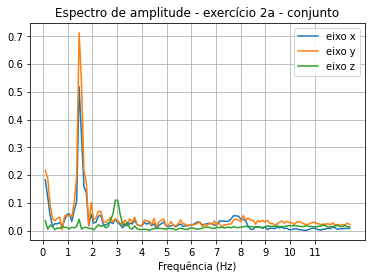

Frequência do pico em y = 1.46484375
Frequência do pico em x = 1.46484375
Frequência do pico em z = 3.02734375


In [24]:
df = pd.read_csv("lab2q2a1-conjunto.csv") 

# Sampling frequency
f_s = 100 # [Hz]
# Number of sample points
N = 1024
# sample spacing
T = 1.0 / f_s

x = df['Time (s)'].to_list()[:N]
xf = fftfreq(N, T)[:N]

y_x = df['Linear Acceleration x (m/s^2)'].to_list()[:N]
yf_x = fft(y_x)

y_y = df['Linear Acceleration y (m/s^2)'].to_list()[:N]
yf_y = fft(y_y)

y_z = df['Linear Acceleration z (m/s^2)'].to_list()[:N]
yf_z = fft(y_z)

# graph
plt.plot(xf[1:128],2.0/N *np.abs(yf_x[1:128]))
plt.plot(xf[1:128],2.0/N *np.abs(yf_y[1:128]))
plt.plot(xf[1:128],2.0/N *np.abs(yf_z[1:128]))
plt.title('Espectro de amplitude - exercício 2a - conjunto')
plt.xlabel('Frequência (Hz)')
plt.legend(['eixo x', 'eixo y', 'eixo z'])
plt.xticks(range(0, 12, 1))
plt.grid()
plt.show()

y=0
i_max = 0
for i in range(128):
    if np.abs(yf_y[i]) > y :
        y= np.abs(yf_y[i])
        i_max = i

print("Frequência do pico em y =", xf[i_max])

x=0
i_max = 0
for i in range(128):
    if np.abs(yf_x[i]) > x :
        x= np.abs(yf_x[i])
        i_max = i

print("Frequência do pico em x =", xf[i_max])

z=0
i_max = 0
for i in range(128):
    if np.abs(yf_z[i]) > z and i>0:
        z= np.abs(yf_z[i])
        i_max = i

print("Frequência do pico em z =", xf[i_max])

Calculando o momento de inércia $J_{Cyy}$

Dados: 
Massa do celular: $m= 141g$
Distância do celular ao eixo ponto O: $L=155mm$ 

Dos gráficos anteriores:

$$\omega_x = 3,027Hz$$
$$\omega_y = 1,46Hz$$

Calculando:

$$
J_{Cyy} = m g^2 \left( \frac{1}{\omega_y^2 \cdot \omega_x^2} -  \frac{1}{\omega_y^4} \right) \rightarrow
J_{Cyy} = 0,141 9,8^2 \left( \cdot \frac{1}{\omega_y^2 \cdot \omega_x^2} -  \cdot \frac{1}{\omega_y^4} \right)
$$



### **2b)** Aplicando uma condição inicial que provoque oscilação simultânea nas duas direções, registre as acelerações nas direções *x* e *y* e verifique novamente as frequências.

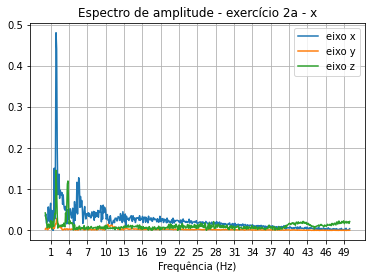

In [6]:
df = pd.read_csv("lab2q2a1-x.csv") 

# Sampling frequency
f_s = 100 # [Hz]
# Number of sample points
N = 1024
# sample spacing
T = 1.0 / f_s

x = df['Time (s)'].to_list()[:N]
xf = fftfreq(N, T)[:N]

y_x = df['Linear Acceleration x (m/s^2)'].to_list()[:N]
yf_x = fft(y_x)

y_y = df['Linear Acceleration y (m/s^2)'].to_list()[:N]
yf_y = fft(y_y)

y_z = df['Linear Acceleration z (m/s^2)'].to_list()[:N]
yf_z = fft(y_z)

# graph
plt.plot(xf[1:N//2],2.0/N *np.abs(yf_x[1:N//2]))
plt.plot(xf[1:N//2],2.0/N *np.abs(yf_y[1:N//2]))
plt.plot(xf[1:N//2],2.0/N *np.abs(yf_z[1:N//2]))
plt.title('Espectro de amplitude - exercício 2a - x')
plt.xlabel('Frequência (Hz)')
plt.legend(['eixo x', 'eixo y', 'eixo z'])
plt.xticks(range(1, 50, 3))
plt.grid()
plt.show()

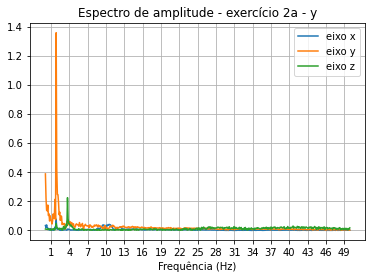

In [7]:
df = pd.read_csv("lab2q2a1-y.csv") 

# Sampling frequency
f_s = 100 # [Hz]
# Number of sample points
N = 1024
# sample spacing
T = 1.0 / f_s

x = df['Time (s)'].to_list()[:N]
xf = fftfreq(N, T)[:N]

y_x = df['Linear Acceleration x (m/s^2)'].to_list()[:N]
yf_x = fft(y_x)

y_y = df['Linear Acceleration y (m/s^2)'].to_list()[:N]
yf_y = fft(y_y)

y_z = df['Linear Acceleration z (m/s^2)'].to_list()[:N]
yf_z = fft(y_z)

# graph
plt.plot(xf[1:N//2],2.0/N *np.abs(yf_x[1:N//2]))
plt.plot(xf[1:N//2],2.0/N *np.abs(yf_y[1:N//2]))
plt.plot(xf[1:N//2],2.0/N *np.abs(yf_z[1:N//2]))
plt.title('Espectro de amplitude - exercício 2a - y')
plt.xlabel('Frequência (Hz)')
plt.legend(['eixo x', 'eixo y', 'eixo z'])
plt.xticks(range(1, 50, 3))
plt.grid()
plt.show()

### **2c)** Com base nas incertezas observadas nos valores das frequências de oscilação, na observação do comportamento dos “pontos fixos” e no valor da massa do celular, estime a incerteza no valor de $J_{Cyy}$.

### **2d)** Mudando a suspensão da direção *x* para a direção *y*, repetir o experimento para determinar o $J_{Cxx}$.

### **2e)** Comparar os resultados experimentais com os teóricos calculados para uma placa retangular de mesmas dimensões externas do celular com massa uniformemente distribuída.

Cálculo para placa uniformemente distribuída

Dimensões do celular:

Altura:	$h = 147,2 mm$

Largura: $ l= 69,5 mm$

Espessura $ e = 8,3 mm$

Momentos de inércia:

$$
J_{Cyy} = \frac{M}{12} \cdot (l^2 + e^2) \Rightarrow J_{Cyy} = \frac{0,141}{12} \cdot (0,0695^2 + 0,0083^2) = 5,756 \cdot 10^{-5} \;\; kg  \cdot m^2 \\
J_{Cxx} = \frac{M}{12} \cdot (h^2 + e^2) \Rightarrow J_{Cyy} = \frac{0,141}{12} \cdot (0,1472^2 + 0,0083^2) = 2,554 \cdot 10^{-4} \;\; kg  \cdot m^2
$$

Frequências de oscilação:



## Exercício 3 

Com o celular suspenso como indicado na figura, por quatro fios verticais de igual comprimento, de modo que as distâncias dos pontos de fixação dos fios no celular até a vertical pelo centro de massa seja aproximadamente a mesma, denominada aqui como *R*, pretende-se estudar a projeção do movimento do celular no plano horizontal que passa pelo centro de massa na posição de equilíbrio.
Para tanto, sendo *x(t)* e *y(t)* os deslocamentos do centro de massa nas direções *x* e *y* indicadas na figura, e *θ(t)* o ângulo de giro do celular em torno do eixo *z*, pede-se:

![Ex2](ex2.png)

### **3a)** Determinar as equações diferenciais dos movimentos oscilatórios de pequena amplitude do celular em torno da posição de equilíbrio, supondo conhecidas suas propriedades de inércia, *L* e *R*.


Rotação em torno do eixo z:
$$
J_{Czz} \ddot \Theta = 4 R T \cdot  \sin \delta \\
4T \cos \delta = mg \Rightarrow 4T = \frac{mg}{\cos \delta} \\
J_{Czz} \ddot \Theta = R \cdot mg \cdot \frac{\sin \delta }{\cos \delta }=  mR \cdot \tg \delta= mgR \cdot \frac{R \Theta}{L} \\
J_{Czz} \ddot \Theta = \frac{mgR^2}{L} \cdot \Theta 
$$

Deslocamento em torno da direção y:
$$
4T \cos \delta = mg \\
m \ddot y = 4T \sin y \\
m \ddot y = mg \tg  \delta \\
m \ddot y = mg  \frac{y}{L} \\
\ddot y = \frac{g}{L} \cdot y
$$

A mesma expressão pode ser escrita para o deslocamento na direção x: 
$$
\ddot x = \frac{g}{L} \cdot x
$$

### **3b)** Determinar as frequências naturais de oscilação do sistema e os modos de vibrar.

$$
\omega_z = \sqrt{\frac{mR^2 \cdot g}{J_{Czz} \cdot L}} \\
\omega_x = \omega_y = \sqrt{\frac{g}{L}}
$$

### **3c)** Supondo conhecidas as frequências naturais, o raio *R* e a massa m do celular, determinar o momento de inércia $J_{Czz}$ do celular em torno do eixo *z*.

$$
\omega_z^2 = \frac{mR^2 }{J_{Czz}} \cdot \frac{g}{L} =  \frac{mR^2 }{J_{Czz}} \cdot \omega_x^2 \\
\Rightarrow J_{Czz} = mR^2 \cdot \frac{\omega_x^2}{\omega_z^2}
$$

## Exercício 4

Com base na disposição da figura e no equacionamento correspondente, suspender o celular em dois laços de fios (linha de costura ou fio dental) de mesmo comprimento, e providenciar um suporte para as extremidades superiores dos fios, (tábua com pregos, estrutura de arames, etc.) de modo a assegurar o mesmo comprimento e paralelismo dos fios com o sistema na posição de equilíbrio. Se na determinação da posição do centro de massa do celular foi observado algum deslocamento significativo em relação ao centro geométrico das bordas, manter o mesmo raio *R* para os pontos de suspensão dos fios.

### **4a)** Colocando o sistema para oscilar no plano horizontal, aplicando condições iniciais adequadas, procure provocar movimento só na direção *x* e registre as acelerações pelo celular nas direções *x*, *y* e *z* do celular e determine a frequência natural de oscilação.

R=42mm
L=258mm

### **4b)** Repita o item anterior para provocar movimento na direção *y* e determine a frequência natural de oscilação.

### **4c)** Aplicando condições iniciais que provoquem principalmente uma oscilação angular em torno de *z*, registre as acelerações nas direções *x*, *y* e *z* do celular e determine as frequências naturais de oscilação.

### **4d)** Com base nas frequências de oscilação e na massa do celular, determine o momento de inércia do celular em relação ao eixo *z* pelo centro de massa *C* ($J_{Czz}$).

### **4e)** Aplicando uma condição inicial que provoque oscilação simultânea nas três variáveis *x(t)*, *y(t)* e *θ(t)*, registre as acelerações nas direções *x*, *y* e *z* do celular e verifique novamente as frequências naturais. Comente os resultados.

### **4f)** Comparar o resultado experimental obtido para $J_{Czz}$ com o teórico calculado para uma placa retangular de mesmas dimensões externas do celular com massa uniformemente distribuída.